In [ ]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/drive')
import sys
# TODO: Change the path below to the path where your folder locates
sys.path.append('/content/drive/My Drive/UCLA/Winter 2024/CSM146/Problem Set 2')

Mounted at /content/drive


In [ ]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os
import time

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

In [ ]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
class PolynomialRegression:
    def __init__(self, m=1, reg_param=0):
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
            lambda_ -- float
                       regularization parameter
        """

        # self.coef_ represents the weights of the regression model
        self.coef_ = None
        self.m_ = m
        self.lambda_ = reg_param

    def generate_polynomial_features(self, X):
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n, d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        X = np.append(np.ones([n,1]), X, 1)
        # part g: modify to create matrix for polynomial model
        m = self.m_
        Phi = np.ones([n,1])
        for i in range(1, m + 1):
          Phi = np.append(Phi, X ** i, 1)

        ### ========== TODO : END ========== ###

        return Phi

    def fit_GD(self, X, y, eta=None, eps=0, tmax=10000, verbose=False):
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """
        if self.lambda_ != 0:
            raise Exception("GD with regularization not implemented")

        X = self.generate_polynomial_features(X)  # map features
        n, d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)  # coefficients
        err_list = np.zeros((tmax, 1))  # errors per iteration

        # GD loop
        for t in range(tmax):
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None:
                k = tmax
                eta = 1/(1+k)  # change this line
            else:
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update w (self.coef_) using one step of GD
            # hint: you can write simultaneously update all w using vector math
            weights = np.array(list(self.coef_))
            for i, val in enumerate(self.coef_):
              total = 0
              for j, x in enumerate(X):
                total += (np.dot(weights, x) - y[j]) * x[i]
              # change the weights
              self.coef_[i] += (-2) * eta * total

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, np.transpose(self.coef_))  # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t - 1]) <= eps:
                break

            # debugging
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                print ("iteration: %d, cost: %f" % (t+1, cost))

        print("number of iterations: %d" % (t + 1))

        return self

    def fit(self, X, y, l2regularize=None):
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            l2regularize    -- set to None for no regularization. set to positive double for L2 regularization

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X)  # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution

        #print("part_e")
        #start_time = time.time()
        self.coef_ = (np.linalg.pinv(np.dot(np.transpose(X),X)).dot(np.transpose(X))).dot(y)
        #stop_time = time.time()
        #run_time = stop_time - start_time
        #print(f"coefficient:{self.coef_}\trun time:{run_time}")

        return self
        ### ========== TODO : END ========== ###

    def predict(self, X):
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None:
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X)  # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, np.transpose(self.coef_))
        ### ========== TODO : END ========== ###

        return y

    def cost(self, X, y):
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(w)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(w)
        cost = 0

        h = self.predict(X)
        for ind, j in enumerate(h):
          # calculate the sum of j(w)
          # sum of (h(xn)-yn)**2
          cost += (h[ind] - y[ind]) ** 2
        ### ========== TODO : END ========== ###
        return cost

    def rms_error(self, X, y):
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y)/len(X))
        ### ========== TODO : END ========== ###
        return error

    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs):
        """Plot regression line."""
        if "color" not in kwargs:
            kwargs["color"] = "r"
        if "linestyle" not in kwargs:
            kwargs["linestyle"] = "-"

        X = np.reshape(np.linspace(0, 1, n), (n, 1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...
Train Data


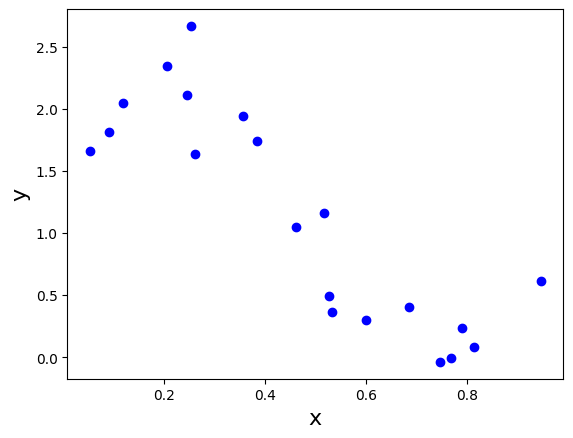

Test Data


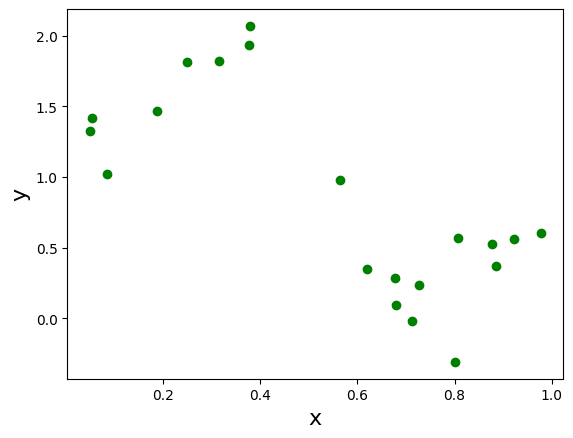

Investigating linear regression...
part_d 1


ValueError: shapes (20,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
######################################################################
# main
######################################################################

def main():
    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  '/content/drive/My Drive/UCLA/Winter 2024/CSM146/Problem Set 2'
    ### ========== TODO : END ========== ###

    train_data = load_data(os.path.join(data_directory_path, "regression_train.csv"))
    test_data = load_data(os.path.join(data_directory_path,"regression_test.csv"))


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print("Visualizing data...")
    print("Train Data")
    plot_data(train_data.X, train_data.y, color='blue')
    print("Test Data")
    plot_data(test_data.X, test_data.y, color="green")
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print("Investigating linear regression...")

    print("part_d 1")
    model = PolynomialRegression(1)
    model.coef_ = np.zeros(2)
    c = model.cost(train_data.X, train_data.y)
    print(f'model_cost:{c}')

    print("part_d 3")
    eta_list = [pow(10, -6), pow(10, -5), pow(10, -3), 0.0168]
    for e in eta_list:
      model.fit_GD(train_data.X, train_data.y, eta=e)
      print(f"eta: {e}\tmodel.coef_:{model.coef_}\tmodel_cost:{model.cost(train_data.X, train_data.y)}")

    # part_e
    model.fit(train_data.X, train_data.y)

    print("part_f")
    start_time = time.time()
    model.fit_GD(train_data.X, train_data.y)
    stop_time = time.time()
    run_time = stop_time - start_time

    print(f"gradient descent\nCoefficients: {model.coef_}\tTime: {run_time}")

    start = time.time()
    model.fit(train_data.X, train_data.y)
    stop = time.time()
    run_time = stop_time - start_time

    print(f"closed form\nCoefficients: {model.coef_}\tTime: {run_time}")
    ### ========== TODO : END ========== ###


    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print("Investigating polynomial regression...")
    train = []
    test = []

    #set up values
    X_train = train_data.X
    y_train = train_data.y
    X_test = test_data.X
    y_test = test_data.y
    x_val = np.arange(11)

    for deg in range(11):
      model = PolynomialRegression(deg)
      model.fit(X_train, y_train)
      train.append(model.rms_error(X_train, y_train))
      test.append(model.rms_error(X_test, y_test))

    plt.plot(x_val, train, color = "blue", label="Training Error")
    plt.plot(x_val, test, color = "yellow", label="Testing Error")
    plt.xlabel("Order of Polynomial")
    plt.ylabel("RMSE")
    plt.title("Order of Polynomial vs. RMSE")
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ###

    for x in list(zip(x_val, train, test)):
      print(x)
    print("Done!")

if __name__ == "__main__":
    main()
